In [36]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem

In [104]:
estimator = "DR"
competition = "L"
agent_num = 6
special = 'adaptiveTrain_extra_3'
extra = 3

# Normal Data

In [66]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_extra_3.json')

In [67]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
agents_part1 = agents[:3]
agents_part2 = agents[agent_num-extra:]
agents2items_part2 = {}
agents2item_values_part2 = {}

for n in range(extra):
    agents2items_part2[f'DR {n+4}'] = agents2items.pop(f'DR {n+4}')
    agents2item_values_part2[f'DR {n+4}'] = agents2item_values.pop(f'DR {n+4}')

agents2items_part1 = agents2items
agents2item_values_part1 = agents2item_values


# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items_part1,
                        agents2item_values_part1,
                        agents_part1,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  34%|███▍      | 5592/16384 [00:11<00:21, 501.15it/s]


Stopping at Epoch 5592



DR 1: 100%|██████████| 32768/32768 [00:16<00:00, 1935.68it/s]


AUC predicting P(win):				 0.7769823662913804
Estimated Utility	 Mean Error:			 0.4343858065844194
Estimated Utility	 Mean Absolute Error:	 0.4561850755143957



Initialising Policy: 100%|██████████| 16384/16384 [00:17<00:00, 951.97it/s]


Predicted mu Gammas:  tensor(0.9843, grad_fn=<MinBackward1>) tensor(1.0253, grad_fn=<MaxBackward1>) tensor(1.0006, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0288, grad_fn=<MinBackward1>) tensor(0.1089, grad_fn=<MaxBackward1>) tensor(0.0498, grad_fn=<MeanBackward0>)



DR 1:  31%|███       | 10155/32768 [00:12<00:28, 803.26it/s]


Stopping at Epoch 10155
DR 1 Number of samples:  torch.Size([6688, 2])
DR 1 Predicted Gammas:  0.6746328 0.93282664 0.7525505
agent: 1




DR 2:  29%|██▉       | 4787/16384 [00:01<00:04, 2669.96it/s]


Stopping at Epoch 4787



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4104.94it/s]


AUC predicting P(win):				 0.8887426976698305
Estimated Utility	 Mean Error:			 0.790441238439258
Estimated Utility	 Mean Absolute Error:	 0.8270102716257614



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1235.19it/s]


Predicted mu Gammas:  tensor(0.9321, grad_fn=<MinBackward1>) tensor(1.0131, grad_fn=<MaxBackward1>) tensor(0.9992, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0427, grad_fn=<MinBackward1>) tensor(0.1083, grad_fn=<MaxBackward1>) tensor(0.0506, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 78/32768 [00:00<00:42, 771.99it/s]

Epoch 00123: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 234/32768 [00:00<00:42, 770.74it/s]

Epoch 00224: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 312/32768 [00:00<00:42, 765.67it/s]

Epoch 00325: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 467/32768 [00:00<00:42, 765.07it/s]

Epoch 00426: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 537/32768 [00:00<00:42, 766.66it/s]


Epoch 00527: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 537
DR 2 Number of samples:  torch.Size([6692, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  41%|████      | 6644/16384 [00:01<00:02, 4473.26it/s]


Stopping at Epoch 6644



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4186.49it/s]


AUC predicting P(win):				 0.6978229533915349
Estimated Utility	 Mean Error:			 0.20861649905184784
Estimated Utility	 Mean Absolute Error:	 0.22053672940343538



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1241.39it/s]


Predicted mu Gammas:  tensor(0.9966, grad_fn=<MinBackward1>) tensor(1.0030, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0357, grad_fn=<MinBackward1>) tensor(0.0862, grad_fn=<MaxBackward1>) tensor(0.0495, grad_fn=<MeanBackward0>)



DR 3:  11%|█         | 3548/32768 [00:04<00:36, 800.22it/s]


Stopping at Epoch 3548
DR 3 Number of samples:  torch.Size([6620, 2])
DR 3 Predicted Gammas:  0.65173763 0.85493684 0.73136
number of iteration: 1

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4038.69it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6642169754247806
Estimated Utility	 Mean Error:			 -0.02745637307482136
Estimated Utility	 Mean Absolute Error:	 0.1475577855887324



DR 1:  16%|█▌        | 5252/32768 [00:01<00:07, 3920.78it/s]

Epoch 04467: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04838: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05095: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  18%|█▊        | 6059/32768 [00:01<00:06, 3968.90it/s]


Epoch 05352: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05609: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05866: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6059
AUC predicting P(win):				 0.6515641469149482
Estimated Utility	 Mean Error:			 -0.00487726658551355
Estimated Utility	 Mean Absolute Error:	 0.1590155270457193



DR 1:   4%|▍         | 1350/32768 [00:01<00:41, 759.56it/s]


Stopping at Epoch 1350
DR 1 Number of samples:  torch.Size([6659, 2])
DR 1 Predicted Gammas:  0.7436327 0.95051235 0.8757164
agent: 1




DR 2:  35%|███▍      | 5711/16384 [00:17<00:32, 324.75it/s]


Stopping at Epoch 5711
AUC predicting P(win):				 0.9782909745847508
Estimated Utility	 Mean Error:			 0.7351362340002318
Estimated Utility	 Mean Absolute Error:	 0.7750330926612432



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4112.77it/s]


AUC predicting P(win):				 0.9761541925155093
Estimated Utility	 Mean Error:			 0.7351362340002318
Estimated Utility	 Mean Absolute Error:	 0.7750330926612432



DR 2:   0%|          | 79/32768 [00:00<00:41, 788.94it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 237/32768 [00:00<00:41, 780.01it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 316/32768 [00:00<00:41, 776.16it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|          | 394/32768 [00:00<00:41, 773.29it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 551/32768 [00:00<00:41, 777.84it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.



DR 2:   2%|▏         | 629/32768 [00:00<00:41, 773.55it/s]

Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 2:   2%|▏         | 707/32768 [00:00<00:41, 766.26it/s]

Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.



DR 2:   3%|▎         | 863/32768 [00:01<00:41, 770.01it/s]

Epoch 00809: reducing learning rate of group 0 to 1.7920e-08.



DR 2:   4%|▍         | 1334/32768 [00:01<00:40, 776.88it/s]


Stopping at Epoch 1334
DR 2 Number of samples:  torch.Size([6727, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:   7%|▋         | 1093/16384 [00:00<00:03, 4597.17it/s][A


Stopping at Epoch 1093
AUC predicting P(win):				 0.797760697539961
Estimated Utility	 Mean Error:			 -0.0033804498571092306
Estimated Utility	 Mean Absolute Error:	 0.08377436283733236



DR 3:  42%|████▏     | 13664/32768 [00:03<00:04, 4115.85it/s]

Epoch 13072: reducing learning rate of group 0 to 6.0000e-04.
Epoch 13343: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13600: reducing learning rate of group 0 to 2.4000e-05.
Epoch 13857: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  45%|████▍     | 14624/32768 [00:03<00:04, 4112.14it/s]


Epoch 14114: reducing learning rate of group 0 to 9.6000e-07.
Epoch 14371: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 14624
AUC predicting P(win):				 0.8010374845216156
Estimated Utility	 Mean Error:			 0.018054969832997005
Estimated Utility	 Mean Absolute Error:	 0.09193644545250616



DR 3:  24%|██▍       | 7797/32768 [00:10<00:33, 736.39it/s]

Epoch 07712: reducing learning rate of group 0 to 1.4000e-03.
Epoch 07813: reducing learning rate of group 0 to 2.8000e-04.



DR 3:  24%|██▍       | 8018/32768 [00:10<00:34, 724.53it/s]

Epoch 07914: reducing learning rate of group 0 to 5.6000e-05.
Epoch 08015: reducing learning rate of group 0 to 1.1200e-05.



DR 3:  25%|██▍       | 8122/32768 [00:10<00:32, 750.82it/s]


Epoch 08116: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 8122
DR 3 Number of samples:  torch.Size([6614, 2])
DR 3 Predicted Gammas:  0.57066 0.7659366 0.6661889
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3238.68it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7171444144510314
Estimated Utility	 Mean Error:			 -0.014650959089137605
Estimated Utility	 Mean Absolute Error:	 0.25471959337944833



DR 1:  18%|█▊        | 5877/32768 [00:01<00:06, 3919.85it/s]

Epoch 05278: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05633: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05890: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  20%|██        | 6665/32768 [00:01<00:06, 3924.23it/s]

Epoch 06147: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06404: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06661: reducing learning rate of group 0 to 1.9200e-07.
Epoch 06918: reducing learning rate of group 0 to 1.0000e-07.


DR 1:  21%|██▏       | 6982/32768 [00:01<00:06, 3902.73it/s]


Stopping at Epoch 6982
AUC predicting P(win):				 0.7283431710986585
Estimated Utility	 Mean Error:			 -0.006888929280556965
Estimated Utility	 Mean Absolute Error:	 0.2553252992083204



DR 1:   7%|▋         | 2321/32768 [00:09<02:04, 245.14it/s]


Stopping at Epoch 2321
DR 1 Number of samples:  torch.Size([6660, 2])
DR 1 Predicted Gammas:  0.7835912 0.92604715 0.8673788
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:06, 2319.60it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.681563529307947
Estimated Utility	 Mean Error:			 0.04665645879136802
Estimated Utility	 Mean Absolute Error:	 0.4061959085228921



DR 2:  14%|█▍        | 4569/32768 [00:01<00:06, 4143.13it/s]

Epoch 03916: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04359: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04616: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  17%|█▋        | 5484/32768 [00:01<00:06, 4133.33it/s]


Epoch 04873: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05130: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05387: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5484
AUC predicting P(win):				 0.6903069752524866
Estimated Utility	 Mean Error:			 0.04665645879136802
Estimated Utility	 Mean Absolute Error:	 0.4061959085228921



DR 2:   5%|▌         | 1801/32768 [00:02<00:39, 776.44it/s]

Epoch 01718: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   7%|▋         | 2346/32768 [00:03<00:39, 766.79it/s]

Epoch 02258: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   8%|▊         | 2655/32768 [00:03<00:39, 766.46it/s]

Epoch 02534: reducing learning rate of group 0 to 5.6000e-05.
Epoch 02635: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   9%|▉         | 2886/32768 [00:03<00:39, 758.69it/s]

Epoch 02736: reducing learning rate of group 0 to 2.2400e-06.
Epoch 02837: reducing learning rate of group 0 to 4.4800e-07.


DR 2:   9%|▉         | 2945/32768 [00:03<00:38, 770.00it/s]


Epoch 02938: reducing learning rate of group 0 to 8.9600e-08.
Stopping at Epoch 2945
DR 2 Number of samples:  torch.Size([6604, 2])
DR 2 Predicted Gammas:  0.86705214 1.0 0.9998038
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4711.30it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8366414475183446
Estimated Utility	 Mean Error:			 -0.014529351324262585
Estimated Utility	 Mean Absolute Error:	 0.09144667457431724



DR 3:  14%|█▎        | 4495/32768 [00:01<00:06, 4068.89it/s]

Epoch 03961: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04447: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04704: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  17%|█▋        | 5651/32768 [00:01<00:06, 4066.33it/s]


Epoch 04961: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05218: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05475: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5651
AUC predicting P(win):				 0.8390832231894626
Estimated Utility	 Mean Error:			 -0.001790088923587304
Estimated Utility	 Mean Absolute Error:	 0.09537388559312293



DR 3:  40%|████      | 13255/32768 [00:17<00:25, 755.10it/s]


Stopping at Epoch 13255
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.42635533 0.73710406 0.65418553


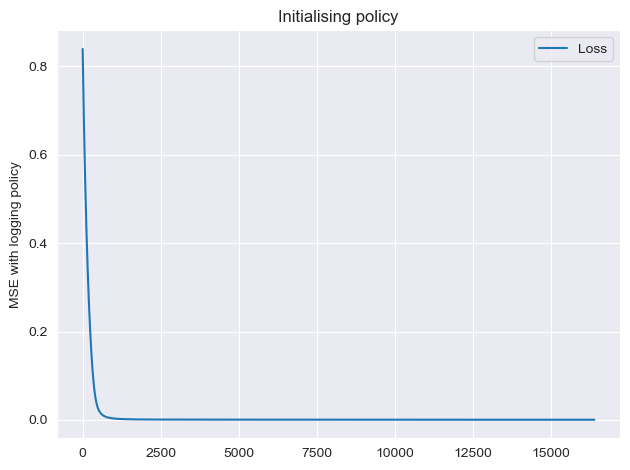

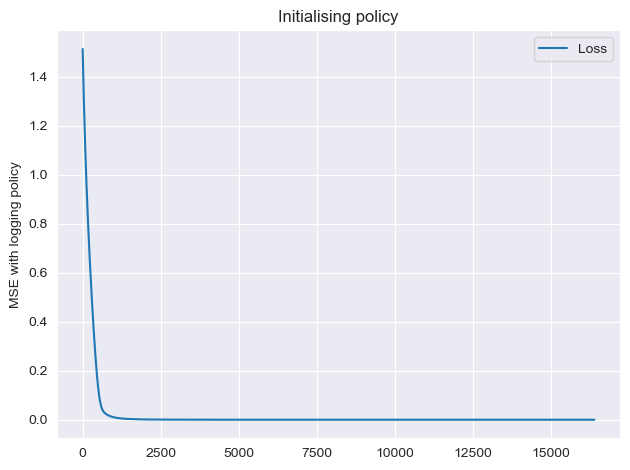

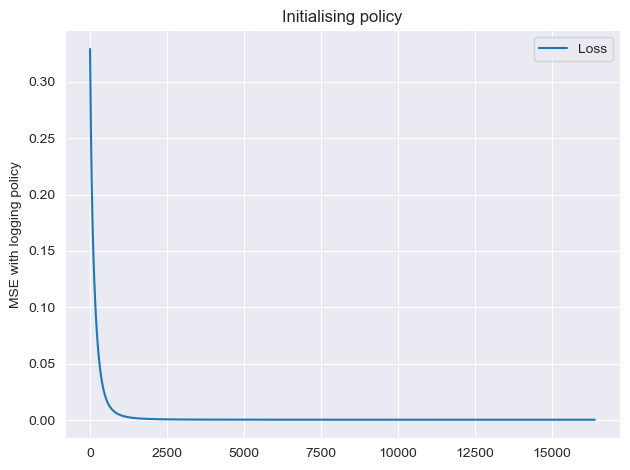

In [68]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [69]:
pickle.dump(auction, open('DR_L_auction_adaptiveTrain_extra_3_part1.pickle', 'wb'))

In [60]:
auction = pickle.load(open('DR_L_auction_adaptiveTrain.pickle', 'rb'))

# data generation

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
DR 1:   6%|▋         | 1025/16384 [00:00<00:08, 1815.63it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.6795984524444343
Estimated Utility	 Mean Error:			 0.02301472483126725
Estimated Utility	 Mean Absolute Error:	 0.14807805434571977


DR 1:  12%|█▏        | 3991/32768 [00:01<00:10, 2760.14it/s]

Epoch 03583: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03901: reducing learning rate of group 0 to 1.2000e-04.


DR 1:  14%|█▍        | 4551/32768 [00:01<00:10, 2773.93it/s]

Epoch 04158: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04415: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04672: reducing learning rate of group 0 to 9.6000e-07.


DR 1:  16%|█▌        | 5228/32768 [00:01<00:09, 2798.26it/s]


Epoch 04929: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05186: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5228
AUC predicting P(win):				 0.6765576192151035
Estimated Utility	 Mean Error:			 0.0013303850856020692
Estimated Utility	 Mean Absolute Error:	 0.13552876537322278


DR 1:   1%|▏         | 437/32768 [00:02<02:40, 202.06it/s]

Epoch 00397: reducing learning rate of group 0 to 1.4000e-03.


DR 1:   2%|▏         | 532/32768 [00:02<02:30, 213.93it/s]

Epoch 00498: reducing learning rate of group 0 to 2.8000e-04.


DR 1:   7%|▋         | 2141/32768 [00:08<02:01, 252.71it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 2141
DR 1 Number of samples:  torch.Size([10965, 2])
DR 1 Predicted Gammas:  0.84761405 0.9575698 0.9015294


DR 2:   6%|▋         | 1025/16384 [00:00<00:08, 1882.07it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.6185968389625723
Estimated Utility	 Mean Error:			 -0.005429853682793461
Estimated Utility	 Mean Absolute Error:	 0.17490856627556928


DR 2:  33%|███▎      | 10976/32768 [00:03<00:07, 2951.06it/s]

Epoch 10436: reducing learning rate of group 0 to 6.0000e-04.
Epoch 10694: reducing learning rate of group 0 to 1.2000e-04.
Epoch 10951: reducing learning rate of group 0 to 2.4000e-05.


DR 2:  35%|███▌      | 11566/32768 [00:04<00:07, 2929.65it/s]

Epoch 11208: reducing learning rate of group 0 to 4.8000e-06.
Epoch 11465: reducing learning rate of group 0 to 9.6000e-07.
Epoch 11722: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  36%|███▌      | 11878/32768 [00:04<00:07, 2780.51it/s]


Stopping at Epoch 11878
AUC predicting P(win):				 0.6194873552379783
Estimated Utility	 Mean Error:			 -0.005545803440475346
Estimated Utility	 Mean Absolute Error:	 0.17487914324044296


DR 2:   0%|          | 140/32768 [00:00<02:21, 231.30it/s]

Epoch 00108: reducing learning rate of group 0 to 1.4000e-03.


DR 2:   1%|          | 248/32768 [00:00<02:11, 247.44it/s]

Epoch 00209: reducing learning rate of group 0 to 2.8000e-04.


DR 2:   1%|          | 354/32768 [00:01<02:07, 254.09it/s]

Epoch 00310: reducing learning rate of group 0 to 5.6000e-05.


DR 2:   1%|▏         | 428/32768 [00:01<02:32, 212.52it/s]

Epoch 00411: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 519/32768 [00:02<02:16, 236.57it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 00512: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 519
DR 2 Number of samples:  torch.Size([11079, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0


DR 3:   6%|▋         | 1025/16384 [00:00<00:10, 1420.39it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7527147385222571
Estimated Utility	 Mean Error:			 0.020332124598807844
Estimated Utility	 Mean Absolute Error:	 0.06855044460302058


DR 3:   5%|▍         | 1482/32768 [00:00<00:10, 2947.81it/s]

Epoch 01121: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01393: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01650: reducing learning rate of group 0 to 2.4000e-05.


DR 3:   7%|▋         | 2374/32768 [00:00<00:10, 2962.42it/s]

Epoch 01907: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02164: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02421: reducing learning rate of group 0 to 1.9200e-07.


DR 3:   8%|▊         | 2580/32768 [00:00<00:10, 2947.99it/s]


Stopping at Epoch 2580
AUC predicting P(win):				 0.7514467145402166
Estimated Utility	 Mean Error:			 0.00030455298659669234
Estimated Utility	 Mean Absolute Error:	 0.05315218134324065


DR 3:   5%|▌         | 1788/32768 [00:11<04:26, 116.45it/s]

Epoch 01780: reducing learning rate of group 0 to 1.4000e-03.


DR 3:   9%|▉         | 3007/32768 [00:18<03:01, 163.63it/s]


Stopping at Epoch 3007
DR 3 Number of samples:  torch.Size([11137, 2])
DR 3 Predicted Gammas:  0.3800289 0.74842465 0.6381425


DR 4:  32%|███▏      | 5184/16384 [00:15<00:33, 331.35it/s]


Stopping at Epoch 5184


DR 4: 100%|██████████| 32768/32768 [00:11<00:00, 2941.43it/s]


AUC predicting P(win):				 0.8060551600374368
Estimated Utility	 Mean Error:			 0.8890814495209449
Estimated Utility	 Mean Absolute Error:	 0.9413832453039994


Initialising Policy: 100%|██████████| 16384/16384 [00:40<00:00, 407.11it/s]


Predicted mu Gammas:  tensor(0.9513, grad_fn=<MinBackward1>) tensor(1.0125, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0341, grad_fn=<MinBackward1>) tensor(0.1486, grad_fn=<MaxBackward1>) tensor(0.0480, grad_fn=<MeanBackward0>)


DR 4:   0%|          | 159/32768 [00:00<02:47, 194.71it/s]

Epoch 00136: reducing learning rate of group 0 to 1.4000e-03.


DR 4:   1%|          | 257/32768 [00:01<02:45, 196.90it/s]

Epoch 00237: reducing learning rate of group 0 to 2.8000e-04.


DR 4:   1%|          | 350/32768 [00:01<03:18, 163.27it/s]

Epoch 00338: reducing learning rate of group 0 to 5.6000e-05.


DR 4:   1%|▏         | 456/32768 [00:02<02:59, 180.39it/s]

Epoch 00439: reducing learning rate of group 0 to 1.1200e-05.


DR 4:   2%|▏         | 560/32768 [00:02<02:50, 189.17it/s]

Epoch 00540: reducing learning rate of group 0 to 2.2400e-06.


DR 4:   2%|▏         | 655/32768 [00:03<02:48, 190.73it/s]


Epoch 00641: reducing learning rate of group 0 to 4.4800e-07.
Stopping at Epoch 655
DR 4 Number of samples:  torch.Size([11226, 2])
DR 4 Predicted Gammas:  0.96082205 1.0 0.99999654


DR 5:  36%|███▌      | 5851/16384 [00:20<00:36, 287.02it/s]


Stopping at Epoch 5851


DR 5:  61%|██████    | 19952/32768 [00:06<00:04, 2888.42it/s]

Epoch 19371: reducing learning rate of group 0 to 6.0000e-04.
Epoch 19636: reducing learning rate of group 0 to 1.2000e-04.
Epoch 19893: reducing learning rate of group 0 to 2.4000e-05.


DR 5:  63%|██████▎   | 20534/32768 [00:07<00:04, 2881.77it/s]

Epoch 20150: reducing learning rate of group 0 to 4.8000e-06.
Epoch 20407: reducing learning rate of group 0 to 9.6000e-07.
Epoch 20664: reducing learning rate of group 0 to 1.9200e-07.


DR 5:  63%|██████▎   | 20794/32768 [00:07<00:04, 2853.81it/s]


Stopping at Epoch 20794
AUC predicting P(win):				 0.6080674572929821
Estimated Utility	 Mean Error:			 0.6258947752289744
Estimated Utility	 Mean Absolute Error:	 0.6568962813699862


Initialising Policy: 100%|██████████| 16384/16384 [00:43<00:00, 379.67it/s]


Predicted mu Gammas:  tensor(0.9944, grad_fn=<MinBackward1>) tensor(1.0067, grad_fn=<MaxBackward1>) tensor(0.9997, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0469, grad_fn=<MinBackward1>) tensor(0.0665, grad_fn=<MaxBackward1>) tensor(0.0507, grad_fn=<MeanBackward0>)


DR 5:  22%|██▏       | 7199/32768 [00:37<02:14, 189.97it/s]


Stopping at Epoch 7199
DR 5 Number of samples:  torch.Size([11072, 2])
DR 5 Predicted Gammas:  0.6994192 0.8921953 0.7612709


DR 6:  34%|███▍      | 5593/16384 [00:13<00:26, 414.49it/s]


Stopping at Epoch 5593


DR 6: 100%|██████████| 32768/32768 [00:11<00:00, 2856.69it/s]


AUC predicting P(win):				 0.7310520393684872
Estimated Utility	 Mean Error:			 0.9191352385530069
Estimated Utility	 Mean Absolute Error:	 0.9576529796640347


Initialising Policy:  95%|█████████▍| 15504/16384 [00:25<00:01, 600.13it/s]


Stopping at Epoch 15504
Predicted mu Gammas:  tensor(0.9989, grad_fn=<MinBackward1>) tensor(1.0051, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0399, grad_fn=<MinBackward1>) tensor(0.0984, grad_fn=<MaxBackward1>) tensor(0.0500, grad_fn=<MeanBackward0>)


DR 6:  22%|██▏       | 7161/32768 [00:22<01:20, 318.86it/s]


Stopping at Epoch 7161
DR 6 Number of samples:  torch.Size([11187, 2])
DR 6 Predicted Gammas:  0.6323254 1.0 0.74675107


The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2643.73it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8153193797257244
Estimated Utility	 Mean Error:			 -0.013095799677775055
Estimated Utility	 Mean Absolute Error:	 0.2502177450617831


DR 1:  15%|█▌        | 4920/32768 [00:01<00:10, 2681.26it/s]

Epoch 04521: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04790: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05047: reducing learning rate of group 0 to 2.4000e-05.


DR 1:  17%|█▋        | 5731/32768 [00:02<00:10, 2640.43it/s]

Epoch 05304: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05561: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05818: reducing learning rate of group 0 to 1.9200e-07.


DR 1:  18%|█▊        | 5899/32768 [00:02<00:10, 2685.45it/s]


Stopping at Epoch 5899
AUC predicting P(win):				 0.8201365541133518
Estimated Utility	 Mean Error:			 -0.0014518987138591125
Estimated Utility	 Mean Absolute Error:	 0.2506997392219549


DR 1:  14%|█▍        | 4664/32768 [00:08<00:53, 528.43it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 4664
DR 1 Number of samples:  torch.Size([11099, 2])
DR 1 Predicted Gammas:  0.48978052 1.0 0.83746225


DR 2:   6%|▋         | 1025/16384 [00:01<00:27, 567.66it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.748424262033915
Estimated Utility	 Mean Error:			 0.004795546678163183
Estimated Utility	 Mean Absolute Error:	 0.3231004686809823


DR 2:  19%|█▉        | 6258/32768 [00:02<00:09, 2829.81it/s]

Epoch 05711: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06065: reducing learning rate of group 0 to 1.2000e-04.


DR 2:  21%|██        | 6823/32768 [00:02<00:09, 2796.78it/s]

Epoch 06322: reducing learning rate of group 0 to 2.4000e-05.
Epoch 06579: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06836: reducing learning rate of group 0 to 9.6000e-07.


DR 2:  22%|██▏       | 7169/32768 [00:02<00:09, 2808.85it/s]


Epoch 07093: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7169
AUC predicting P(win):				 0.7522626441183524
Estimated Utility	 Mean Error:			 0.004795977363356264
Estimated Utility	 Mean Absolute Error:	 0.3231000379957892


DR 2:   9%|▉         | 3046/32768 [00:06<01:00, 487.61it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 3046
DR 2 Number of samples:  torch.Size([11145, 2])
DR 2 Predicted Gammas:  0.5832523 1.0 0.98127997


DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4110.70it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7378998769132613
Estimated Utility	 Mean Error:			 -0.010517158927620762
Estimated Utility	 Mean Absolute Error:	 0.09554297767298732


DR 3:  23%|██▎       | 7675/32768 [00:02<00:08, 2950.68it/s]

Epoch 07190: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07470: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07727: reducing learning rate of group 0 to 2.4000e-05.


DR 3:  26%|██▌       | 8560/32768 [00:02<00:08, 2929.59it/s]

Epoch 07984: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08241: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08498: reducing learning rate of group 0 to 1.9200e-07.


DR 3:  26%|██▋       | 8634/32768 [00:02<00:08, 2931.83it/s]


Stopping at Epoch 8634
AUC predicting P(win):				 0.7377808776544716
Estimated Utility	 Mean Error:			 0.01213670485569098
Estimated Utility	 Mean Absolute Error:	 0.1093637938608199


DR 3:   9%|▉         | 3053/32768 [00:05<00:56, 529.11it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 3053
DR 3 Number of samples:  torch.Size([11167, 2])
DR 3 Predicted Gammas:  0.5344773 0.919218 0.79040927


DR 4:  18%|█▊        | 2989/16384 [00:06<00:30, 443.29it/s]


Stopping at Epoch 2989
AUC predicting P(win):				 0.9029319808903643
Estimated Utility	 Mean Error:			 0.12158471410737326
Estimated Utility	 Mean Absolute Error:	 0.32749858164771467


DR 4:  33%|███▎      | 10877/32768 [00:03<00:07, 2846.65it/s]

Epoch 10543: reducing learning rate of group 0 to 6.0000e-04.
Epoch 10801: reducing learning rate of group 0 to 1.2000e-04.
Epoch 11058: reducing learning rate of group 0 to 2.4000e-05.


DR 4:  36%|███▌      | 11728/32768 [00:04<00:07, 2812.45it/s]

Epoch 11315: reducing learning rate of group 0 to 4.8000e-06.
Epoch 11572: reducing learning rate of group 0 to 9.6000e-07.
Epoch 11829: reducing learning rate of group 0 to 1.9200e-07.


DR 4:  37%|███▋      | 12073/32768 [00:04<00:07, 2778.26it/s]


Stopping at Epoch 12073
AUC predicting P(win):				 0.9154118242537697
Estimated Utility	 Mean Error:			 0.12159807252621943
Estimated Utility	 Mean Absolute Error:	 0.3275083925162881


DR 4:   1%|          | 218/32768 [00:00<00:59, 544.10it/s]

Epoch 00112: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00213: reducing learning rate of group 0 to 2.8000e-04.


DR 4:   1%|          | 383/32768 [00:00<00:59, 543.84it/s]

Epoch 00314: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00415: reducing learning rate of group 0 to 1.1200e-05.


DR 4:   2%|▏         | 524/32768 [00:00<00:59, 540.21it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 00516: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 524
DR 4 Number of samples:  torch.Size([11118, 2])
DR 4 Predicted Gammas:  1.0 1.0 1.0


DR 5:  26%|██▋       | 4331/16384 [00:01<00:04, 2545.26it/s]


Stopping at Epoch 4331
AUC predicting P(win):				 0.7216564016596344
Estimated Utility	 Mean Error:			 0.09549347598163115
Estimated Utility	 Mean Absolute Error:	 0.2318936662474878


DR 5:  30%|██▉       | 9768/32768 [00:03<00:08, 2779.07it/s]

Epoch 09346: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09615: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09872: reducing learning rate of group 0 to 2.4000e-05.


DR 5:  32%|███▏      | 10627/32768 [00:03<00:07, 2834.25it/s]

Epoch 10129: reducing learning rate of group 0 to 4.8000e-06.
Epoch 10386: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10643: reducing learning rate of group 0 to 1.9200e-07.


DR 5:  34%|███▎      | 11044/32768 [00:03<00:07, 2774.37it/s]


Epoch 10900: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 11044
AUC predicting P(win):				 0.7254915485242677
Estimated Utility	 Mean Error:			 0.13053989608754105
Estimated Utility	 Mean Absolute Error:	 0.25402256782273913


DR 5:   1%|          | 170/32768 [00:00<00:58, 554.05it/s]

Epoch 00108: reducing learning rate of group 0 to 1.4000e-03.


DR 5:   7%|▋         | 2163/32768 [00:03<00:54, 561.83it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 2163
DR 5 Number of samples:  torch.Size([11150, 2])
DR 5 Predicted Gammas:  0.61799145 0.8153741 0.70947057


DR 6:  24%|██▎       | 3861/16384 [00:01<00:04, 2540.94it/s]


Stopping at Epoch 3861
AUC predicting P(win):				 0.7215320956812601
Estimated Utility	 Mean Error:			 0.08464139835693446
Estimated Utility	 Mean Absolute Error:	 0.2909138923419907


DR 6:  40%|████      | 13193/32768 [00:04<00:06, 2877.59it/s]

Epoch 12666: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12924: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13181: reducing learning rate of group 0 to 2.4000e-05.


DR 6:  42%|████▏     | 13768/32768 [00:04<00:06, 2856.61it/s]

Epoch 13438: reducing learning rate of group 0 to 4.8000e-06.
Epoch 13695: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13952: reducing learning rate of group 0 to 1.9200e-07.


DR 6:  44%|████▍     | 14384/32768 [00:05<00:06, 2853.12it/s]


Epoch 14209: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 14384
AUC predicting P(win):				 0.7585639067990071
Estimated Utility	 Mean Error:			 0.11101045668685196
Estimated Utility	 Mean Absolute Error:	 0.30001723429922544


DR 6:   7%|▋         | 2217/32768 [00:03<00:53, 565.90it/s]


Stopping at Epoch 2217
DR 6 Number of samples:  torch.Size([10989, 2])
DR 6 Predicted Gammas:  0.552455 0.8958062 0.73910517


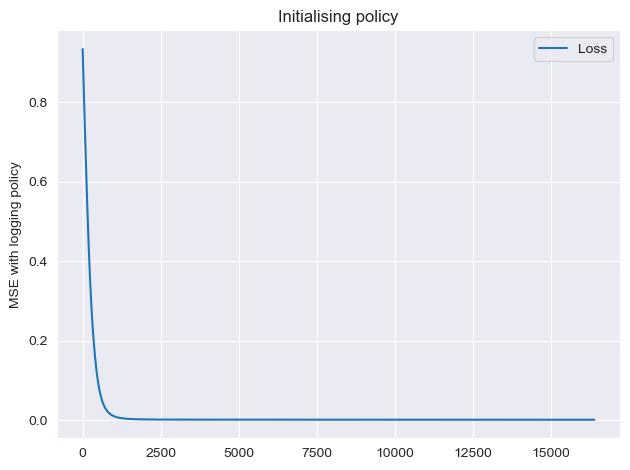

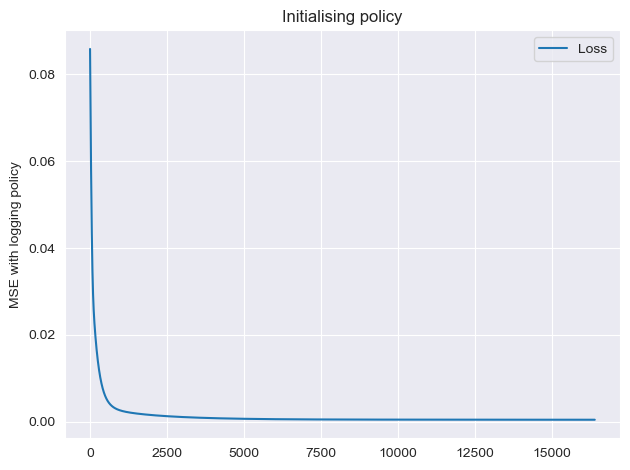

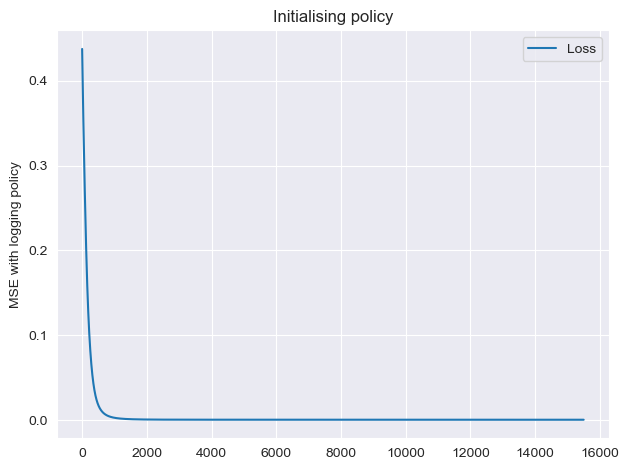

In [70]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}

data_split_line = [0, 0.8, 0.9, 1]

all_data = {agent_id: [] for agent_id in range(agent_num)}

adaptive_training = [33333, 33333, 33334]

for i in range(3):
    if i == 0 or i == 2:
        for _ in range(adaptive_training[i]):
            auction.simulate_opportunity()
    elif i == 1:
        auction.agents.extend(agents_part2)
        auction.agent2items.update(agents2items_part2)
        auction.agents2item_values.update(agents2item_values_part2)
        for _ in range(adaptive_training[i]):
            auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]

        temp_data = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))

        all_data[agent_id].append(temp_data)

        if i == 1 or i ==2:
            agent.update(iteration = 2+i)
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

for agent_id, data in all_data.items():
    data = np.concatenate(data, axis=0)

    for j, data_set in enumerate(offline_data.keys()):
        offline_data[data_set][agent_id] = data[int(data_split_line[j]*len(data)):int(data_split_line[j+1]*len(data)), :]

In [101]:
for agent_id in range(agent_num):
    for j, data_set in enumerate(offline_data.keys()):
        offline_data[data_set][agent_id][:, 8] = offline_data[data_set][agent_id][:, 8].astype(float)

In [102]:
pickle.dump(auction, open('DR_L_auction_adaptiveTrain_extra_3_part2.pickle', 'wb'))

# Save Data

In [103]:
data_dir = f"../data_{estimator}_{competition}_{special}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [103]:
# import split_data
# import importlib
# importlib.reload(split_data)
from split_data import split_data

In [104]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', special='_'+special)

# Read data

In [3]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [4]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [6]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/test_{agent_id}.csv")

# CUTree

In [18]:
#for agent_id in offline_data['train'].keys():
agent_id = 3
min_split_int = 50
for max_depth in [10, 20, 35, 50]:
        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory=f"../data_DR_L_split_1000_{special}/train/")

        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
        print("Agent", agent_id)
        print("Max Depth", max_depth)
        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 7]

        input_val_data = offline_data['val'][agent_id][:, :5]
        label_val_data = offline_data['val'][agent_id][:, 7]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=24, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=24, data_set='val')
        print("Train R2 score:", r2_score(label_train_data, train_preds))
        print("Val R2 score:", r2_score(label_val_data, val_preds))
        print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
        print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

Agent 3
Max Depth 10
<ipykernel.iostream.OutStream object at 0x10455bb50> starting from 24
<ipykernel.iostream.OutStream object at 0x10455bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10455bb50> starting from 24
<ipykernel.iostream.OutStream object at 0x10455bb50> finishing read tree
Train R2 score: -0.1628808557667205
Val R2 score: -3.357625255328
Train MSE:  0.1733858274218201
Val MSE:  0.3555975619194234
Agent 3
Max Depth 20
<ipykernel.iostream.OutStream object at 0x10455bb50> starting from 24
<ipykernel.iostream.OutStream object at 0x10455bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10455bb50> starting from 24
<ipykernel.iostream.OutStream object at 0x10455bb50> finishing read tree
Train R2 score: 0.10361424692097865
Val R2 score: -2.05355883590879
Train MSE:  0.13365134073366805
Val MSE:  0.2491811511095501
Agent 3
Max Depth 35
<ipykernel.iostream.OutStream object at 0x10455bb50> starting from 24
<ipykernel.iostream.OutStream object at 

In [58]:
train_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_H/agent_0/model_boost_linear_qsplit_noabs_save_split_1000_3000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/', read_game_number=53, data_set='train')

<ipykernel.iostream.OutStream object at 0x107be7c40> starting from 53
<ipykernel.iostream.OutStream object at 0x107be7c40> finishing read tree


In [34]:
test_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_H/agent_2/model_boost_linear_qsplit_noabs_save_split_1000_3000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/', read_game_number=53, data_set='test')

<ipykernel.iostream.OutStream object at 0x107be7c40> starting from 53
<ipykernel.iostream.OutStream object at 0x107be7c40> finishing read tree


In [38]:
print("Train MSE: ", mean_squared_error(offline_data['train'][2][:, 7], train_preds_CUTree_1000))
print("Test MSE: ", mean_squared_error(offline_data['test'][2][:, 7], test_preds_CUTree_1000))
print("Train R2", r2_score(offline_data['train'][2][:, 7], train_preds_CUTree_1000))
print("Test R2", r2_score(offline_data['test'][2][:, 7], test_preds_CUTree_1000))

Train MSE:  0.0018965843856246472
Test MSE:  0.001954897140573292
Train R2 0.2662253759843558
Test R2 0.26324481410297074


# M5 Tree

In [105]:
from m5py import M5Prime, export_text_m5

In [106]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [111]:
param_grid = {
    'max_depth': [ 10, 20, 35 ]
    #'min_samples_split': [2, 4, 10, 20, 36, 50]
}

In [108]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_)
    return best_model

In [112]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, 7].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :5].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, 7].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :5].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, 7].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 35}
R2 score for GS 0.9072286892637528
Test R2 score: 0.9089801835214961
Train MSE:  0.003394615149861039
Test MSE:  0.006410337610251987
Agent 1
Param for GS {'max_depth': 35}
R2 score for GS 0.9410942494992334
Test R2 score: 0.9388259812260267
Train MSE:  0.002329357493325437
Test MSE:  0.003956988590981304
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.7872076529852474
Test R2 score: 0.7934274149453268
Train MSE:  0.001433034006846277
Test MSE:  0.003059925126301332
Agent 3
Param for GS {'max_depth': 10}
R2 score for GS -1.3722167718810567
Test R2 score: -1.5306654226829695
Train MSE:  0.20991010214612746
Test MSE:  0.3151884073951127
Agent 4
Param for GS {'max_depth': 10}
R2 score for GS -6.874248386968423
Test R2 score: -6.849649040367788
Train MSE:  0.13778046361062996
Test MSE:  0.18877547765640776
Agent 5
Param for GS {'max_depth': 10}
R2 score for GS -6.740497342037329
Test R2 score: -6.790849252517273
Train MSE:  0.2185233509271626

In [110]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.8592060841547015
Test R2 score: 0.8572566015928667
Train MSE:  0.0006393493915958017
Test MSE:  0.010053122614683952
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.9045949315206318
Test R2 score: 0.8990009692294245
Train MSE:  0.0002996846579188026
Test MSE:  0.006533035109822959
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.7018513449015619
Test R2 score: 0.6846563551035951
Train MSE:  0.00022034793326119876
Test MSE:  0.00467113262963993
Agent 3
Param for GS {'max_depth': 10}
R2 score for GS -1.5635253216016216
Test R2 score: -1.6609657238096012
Train MSE:  0.1944487443932129
Test MSE:  0.3314170024622813
Agent 4
Param for GS {'max_depth': 10}
R2 score for GS -7.3615803075061415
Test R2 score: -7.411738664468052
Train MSE:  0.12621601252932924
Test MSE:  0.20229311860182592
Agent 5
Param for GS {'max_depth': 10}
R2 score for GS -7.248174806123368
Test R2 score: -7.4051525570300765
Train MSE:  0.199292819761

In [27]:
offline_data['train'][2][:, 7].std()

0.2587533890799266

In [28]:
offline_data['train'][1][:, 7].st

AttributeError: 'numpy.ndarray' object has no attribute 'st'

In [41]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [42]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.004906677055637212
Surrogate utility: 0.005488817879097059
R2 score: 0.8630118454135507
Agent: 1
Original utility: 0.047288165889720034
Surrogate utility: 0.0436259102955381
R2 score: 0.8579546731914592
Agent: 2
Original utility: 0.03137086689375815
Surrogate utility: 0.03045715435526283
R2 score: 0.9170638279535878


<AxesSubplot:>

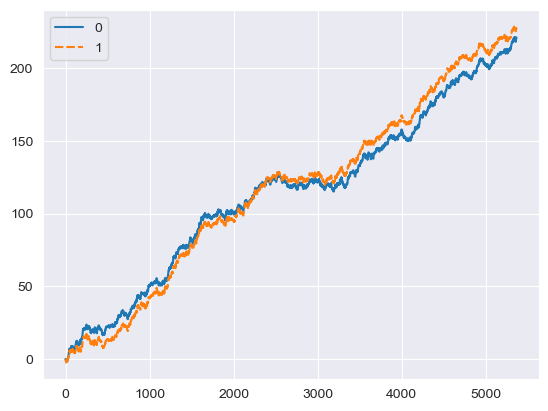

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

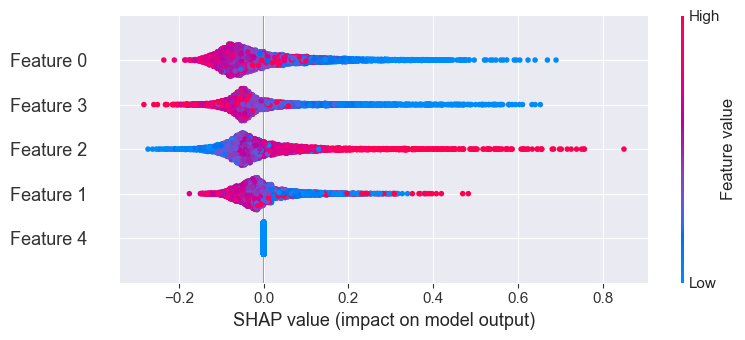

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2